## Python

### Question 1: -
**Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.**

**Note** - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

**Example input** - string = “write write write all the number from from from 1 to 100”

**Example output** - 5

**Explanation** - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [1]:
def highest_freq_word_len(string):
    """
    This function returns max length of word that has max occurance.
    ===========================================================================================================
    Args:
    string: Input string->str
    
    Returns:
    max length of the word->int
    
    """
    try:
        # Split input words
        words = string.split()
        #initiate empty dict
        word_freq = {}
        for word in words:
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1
        #find frequency of the word that that most occurance
        highest_freq = max(word_freq.values())
        #find max length of word that has most occurance
        highest_freq_words = []

        for word, freq in word_freq.items():
            if freq == highest_freq:
                highest_freq_words.append(word)

        highest_freq_word_len = max(len(word) for word in highest_freq_words)

        return highest_freq_word_len
    
    except:
        return "An error occured"


In [2]:
highest_freq_word_len('write write write all the number from from from 1 to 100')

5

In [3]:
highest_freq_word_len('hello Hello hello how are are you')

5

In [4]:
highest_freq_word_len('hello Hello hello how are are are you')

3

 - From the given string we can note that the most frequent word is “are” and its corresponding length is 3

### Question 2: -

**Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .**

**Note** - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }

Example output 1- YES

Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }

Example output 2 - NO

In [5]:
def str_valid(string):
    """
    This function returns whether the given string is valid or not.
    ===========================================================================================================
    Args:
    string: Input string->str
    
    Returns:
    yes/no->str
    
    """
    try:
        # Count the frequency of each character in the string
        char_count = {}
        for char in string:
            if char in char_count:
                char_count[char] += 1
            else:
                char_count[char] = 1
        # Count the frequency
        freq_count = {}
        for freq in char_count.values():
            if freq in freq_count:
                freq_count[freq] += 1
            else:
                freq_count[freq] = 1

        if len(freq_count) == 1:
            return "YES"
        elif len(freq_count) == 2:
            min_freq, max_freq = sorted(freq_count.keys())
            if freq_count[min_freq] == 1 and min_freq == 1:
                return "YES"
            if freq_count[max_freq] == 1 and max_freq - min_freq == 1:
                return "YES"

        return "NO"
    
    except:
        return "An error occured"


In [6]:
str_valid('abc')

'YES'

In [7]:
str_valid('abcc')

'YES'

- This string is valid as we can remove only 1 occurrence of “c”. That leaves character frequencies of { “a”: 1, “b”: 1 , “c”: 1 }

In [8]:
str_valid('abccc')

'NO'

- This string is not valid as we can remove only 1 occurrence of “c”. That leaves character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }

In [9]:
str_valid('aabbbbcc')

'NO'

- This string is not valid as we can remove only 1 occurrence of “b”. That leaves character frequencies of { “a”: 2, “b”: 3 , “c”: 2 }

In [10]:
str_valid('aaabbbcc')

'NO'

- This string is not valid as we can remove only 1 occurrence of “a” or “b”. That leaves character frequencies of { “a”: 2, “b”: 3 , “c”: 2 } or { “a”: 3, “b”: 2 , “c”: 2 }

### Question 3:

**Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.**

**Note** - Write comments wherever necessary explaining the code written.

**Link** - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json
    
Data Attributes - 
- id: Identification Number - int 
- num: Number of the Pokémon in the official Pokédex - int 
- name: Pokémon name -string 
- img: URL to an image of this Pokémon - string 
- type:Pokémon type -string 
- height: Pokémon height - float
- weight: Pokémon weight - float 
- candy: type of candy used to evolve Pokémon or given when transferred - string 
- candy_count: the amount of candies required to evolve-int
- egg: Number of kilometers to travel to hatch the egg - float 
- spawn_chance: Percentage of spawn chance (NEW) - float 
- avg_spawns: Number of this pokemon on 10.000 spawns (NEW) - int
- spawn_time: Spawns most active at the time on this field. Spawn times are the same for all
time zones and are expressed in local time. (NEW) - “minutes: seconds” 
- multipliers: Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
- weakness: Types of Pokémon this Pokémon is weak to - list of strings 
- next_evolution: Number and Name of successive evolutions of Pokémon - list of dict
- prev_evolution: Number and Name of previous evolutions of Pokémon - list of dict

In [11]:
import requests
import json
import pandas as pd

def download_and_convert_to_excel(link, output_file):
    """
    This function download data from link and returns excel document.
    ===========================================================================================================
    Args:
    string: Input string->link,output file name
    
    Returns:
    excel file
    
    """
    try:
        # Download the data from the provided link
        response = requests.get(link)
        data = response.json()

        # Convert the data to a Pandas DataFrame
        df = pd.DataFrame(data['pokemon'])
        #extracting data from 'egg' column
        df['egg'] = df['egg'].replace(['Not in Eggs','Omanyte Candy','2 km','5 km','10 km'],[0,0,2,5,10])
        #changing datatype
        df['height'] = df['height'].str.split(' ').str.get(0).astype('float')
        df['weight'] = df['weight'].str.split(' ').str.get(0).astype('float')
        #df['candy_count'] = df['candy_count'].astype('int')
        #df['avg_spawns'] = df['avg_spawns'].astype('int')
        df['egg'] = df['egg'].astype('float')
        # Save the DataFrame to an Excel file
        df.to_excel(output_file, index=False)
        print(f"Data downloaded and saved as '{output_file}'")
              
    except:
        print("An error occured")

In [12]:
# Provide the link and output file path
link = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
output_file = "pokemon_data.xlsx"

# Call the function to download and convert the data
download_and_convert_to_excel(link, output_file)

Data downloaded and saved as 'pokemon_data.xlsx'


### Question 4 

**Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.**

**Link** - https://data.nasa.gov/resource/y77d-th95.json
**Note** - Write code comments wherever needed for code understanding.

Excepted Output Data Attributes
- Name of Earth Meteorite - string 
- id - ID of Earth Meteorite - int 
- nametype - string 
- recclass - string
- mass - Mass of Earth Meteorite - float 
- year - Year at which Earth Meteorite was hit - datetime format 
- reclat - float 
- recclong - float
- point coordinates - list of int

In [13]:
import requests
import json
import pandas as pd

In [14]:
def download_and_convert_to_csv(link, output_file):
    """
    This function download data from link and returns csv document.
    ===========================================================================================================
    Args:
    string: Input string->link,output file name
    
    Returns:
    csv file
    """
    try:
        # Download the data from the provided link
        response = requests.get(link)
        data = response.json()
        # Convert to DataFrame
        df = pd.DataFrame(data)
        #creating new column 'point coordinates'
        df['point coordinates'] =  df['geolocation'].apply(lambda x :list(df['geolocation'].iloc[0].values())[1])
        # Remove geolocation column and other two columns
        df.drop(columns = ['geolocation',':@computed_region_cbhk_fwbd',':@computed_region_nnqa_25f4'], axis=1, inplace=True)
        # Save DataFrame to CSV file
        print(f"Data downloaded and saved as '{output_file}'")
              
    except:
        print("An error occured")

In [15]:
# Provide the link and output file path
link = "https://data.nasa.gov/resource/y77d-th95.json"
output_file = "nasa_data.csv"

# Call the function to download and convert the data
download_and_convert_to_csv(link, output_file)

Data downloaded and saved as 'nasa_data.csv'


### Question 5

**Write a program to download the data from the given API link and then extract the following data with
proper formatting**

**Link** - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
**Note** - Write proper code comments wherever needed for the code understanding

Excepted Output Data Attributes -
- id - int 
- url - string
- name - string 
- season- int 
- number - int
- type - string 
- airdate -date format 
- airtime - 12-hour time format
- runtime - float
- average rating - float
- summary - string
- without html tags
- medium image link - string
- Original image link - string

In [16]:
import requests
import json
import pandas as pd

In [17]:
def download_and_convert_to_csv(link, output_file):
    """
    This function download data from link and returns csv document.
    ===========================================================================================================
    Args:
    string: Input string->link,output file name
    
    Returns:
    csv file
    """
    try:
        # Download the data from the provided link
        response = requests.get(link)
        data = response.json()
        data = data['_embedded']
        # Convert to DataFrame
        df = pd.DataFrame(data['episodes'])
        #changing datatype.
        df['runtime'] = df['runtime'].astype('int')
        #creating new column 'medium image link'
        df['medium image link'] =  df['image'].apply(lambda x :list(df['image'].iloc[0].values())[0])
        #creating new column 'Original image link'
        df['Original image link'] =  df['image'].apply(lambda x :list(df['image'].iloc[0].values())[1])
        df.drop(columns=['image','airstamp','_links'],axis=1,inplace=True)
        # Save DataFrame to CSV file
        df.to_csv(output_file, index=False)
        print(f"Data downloaded and saved as '{output_file}'")
              
    except:
        print("An error occured")

In [18]:
# Provide the link and output file path
link = " http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
output_file = "westworld.csv"
# Call the function to download and convert the data
download_and_convert_to_csv(link, output_file)

Data downloaded and saved as 'westworld.csv'


In [19]:
df = pd.read_csv('../python/westworld.csv')

In [20]:
#changing datatypes
df['airdate'] = pd.to_datetime(df['airdate'])

In [21]:
df['airtime'] = pd.to_datetime(df['airtime'])

In [22]:
df['airtime'] = pd.to_datetime(df['airtime']).dt.strftime('%I:%M %p')

In [23]:
df['airtime'] = pd.to_datetime(df['airtime'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   36 non-null     int64         
 1   url                  36 non-null     object        
 2   name                 36 non-null     object        
 3   season               36 non-null     int64         
 4   number               36 non-null     int64         
 5   type                 36 non-null     object        
 6   airdate              36 non-null     datetime64[ns]
 7   airtime              36 non-null     datetime64[ns]
 8   runtime              36 non-null     int64         
 9   rating               36 non-null     object        
 10  summary              36 non-null     object        
 11  medium image link    36 non-null     object        
 12  Original image link  36 non-null     object        
dtypes: datetime64[ns](2), int64(4), objec

In [25]:
#saving updated file
df.to_csv('westworld.csv')

### Question 6 -
**Using the data from Question 3, write code to analyze the data and answer the following questions**

**Note** 

1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
- Get all Pokemons whose spawn rate is less than 5%
- Get all Pokemons that have less than 4 weaknesses
- Get all Pokemons that have no multipliers at all
- Get all Pokemons that do not have more than 2 evolutions
- Get all Pokemons whose spawn time is less than 300 seconds.

Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

- Get all Pokemon who have more than two types of capabilities

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_excel('../python/pokemon_data.xlsx')

In [28]:
df.head(2)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25.0,2,0.690,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100.0,0,0.042,4.2,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"


In [29]:
df.shape

(151, 17)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    int64  
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    float64
 6   weight          151 non-null    float64
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    int64  
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      145 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(5), int64(3), object(9)


In [31]:
df['name'].nunique()

151

#### Get all Pokemons whose spawn rate is less than 5%

In [32]:
df1 = df[df['spawn_chance']<0.05]

In [33]:
#df1[['name']]

In [34]:
df1['name'].nunique()

65

` 65 Pokemons whose spawn rate is less than 5% `

In [35]:
print(df1['name'].unique())

['Ivysaur' 'Venusaur' 'Charmeleon' 'Charizard' 'Wartortle' 'Blastoise'
 'Butterfree' 'Raichu' 'Sandslash' 'Nidoqueen' 'Nidoking' 'Clefable'
 'Ninetales' 'Wigglytuff' 'Vileplume' 'Dugtrio' 'Persian' 'Primeape'
 'Arcanine' 'Poliwrath' 'Kadabra' 'Alakazam' 'Machoke' 'Machamp'
 'Victreebel' 'Golem' 'Rapidash' 'Slowbro' 'Magneton' "Farfetch'd"
 'Dewgong' 'Muk' 'Cloyster' 'Gengar' 'Electrode' 'Exeggutor' 'Marowak'
 'Hitmonlee' 'Hitmonchan' 'Lickitung' 'Weezing' 'Rhydon' 'Chansey'
 'Kangaskhan' 'Seadra' 'Starmie' 'Mr. Mime' 'Gyarados' 'Lapras' 'Ditto'
 'Vaporeon' 'Jolteon' 'Flareon' 'Porygon' 'Omastar' 'Kabutops'
 'Aerodactyl' 'Snorlax' 'Articuno' 'Zapdos' 'Moltres' 'Dragonair'
 'Dragonite' 'Mewtwo' 'Mew']


#### Get all Pokemons that have less than 4 weaknesses

In [36]:
df.sample(2)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01,60.0,None,NaN,0,0.000,0.0,NaN,NaN,"['Water', 'Electric', 'Rock']",NaN,NaN
10,11,11,Metapod,http://www.serebii.net/pokemongo/pokemon/011.png,['Bug'],0.71,9.9,Caterpie Candy,50.0,0,0.187,18.7,02:11,"[3.55, 3.79]","['Fire', 'Flying', 'Rock']","[{'num': '012', 'name': 'Butterfree'}]","[{'num': '010', 'name': 'Caterpie'}]"


In [37]:
df['weaknessess'] = df['weaknesses'].str.strip('[,]').str.split(',')

In [38]:
df2 = df[df['weaknessess'].apply(lambda x: len(x) < 4)]

In [39]:
df2.sample(5)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknessess
132,133,133,Eevee,http://www.serebii.net/pokemongo/pokemon/133.png,['Normal'],0.30,6.5,Eevee Candy,25.0,10,2.750,275.0,05:32,"[2.02, 2.64]",['Fighting'],"[{'num': '134', 'name': 'Vaporeon'}, {'num': '...",NaN,['Fighting']
87,88,88,Grimer,http://www.serebii.net/pokemongo/pokemon/088.png,['Poison'],0.89,30.0,Grimer Candy,50.0,5,0.052,5.2,15:11,[2.44],"['Ground', 'Psychic']","[{'num': '089', 'name': 'Muk'}]",NaN,"['Ground', 'Psychic']"
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51,9.0,Squirtle Candy,25.0,2,0.580,58.0,04:25,[2.1],"['Electric', 'Grass']","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN,"['Electric', 'Grass']"
54,55,55,Golduck,http://www.serebii.net/pokemongo/pokemon/055.png,['Water'],1.70,76.6,Psyduck Candy,NaN,0,0.087,8.7,23:06,NaN,"['Electric', 'Grass']",NaN,"[{'num': '054', 'name': 'Psyduck'}]","['Electric', 'Grass']"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01,122.0,None,NaN,0,0.000,0.0,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN,"['Bug', 'Ghost', 'Dark']"


In [40]:
#df2[['name']]

In [41]:
print(df2['name'].nunique())

102


`102 Pokemons that have less than 4 weaknesses`

In [42]:
print(df2['name'].unique())

['Charmander' 'Charmeleon' 'Charizard' 'Squirtle' 'Wartortle' 'Blastoise'
 'Caterpie' 'Metapod' 'Pidgey' 'Pidgeotto' 'Pidgeot' 'Rattata' 'Raticate'
 'Spearow' 'Fearow' 'Ekans' 'Arbok' 'Pikachu' 'Raichu' 'Sandshrew'
 'Sandslash' 'Nidoran ♀ (Female)' 'Nidorina' 'Nidoran ♂ (Male)' 'Nidorino'
 'Clefairy' 'Clefable' 'Vulpix' 'Ninetales' 'Jigglypuff' 'Wigglytuff'
 'Diglett' 'Dugtrio' 'Meowth' 'Persian' 'Psyduck' 'Golduck' 'Mankey'
 'Primeape' 'Growlithe' 'Arcanine' 'Poliwag' 'Poliwhirl' 'Abra' 'Kadabra'
 'Alakazam' 'Machop' 'Machoke' 'Machamp' 'Tentacool' 'Tentacruel' 'Ponyta'
 'Rapidash' 'Magnemite' 'Magneton' "Farfetch'd" 'Doduo' 'Dodrio' 'Seel'
 'Grimer' 'Muk' 'Shellder' 'Drowzee' 'Hypno' 'Krabby' 'Kingler' 'Voltorb'
 'Electrode' 'Cubone' 'Marowak' 'Hitmonlee' 'Hitmonchan' 'Lickitung'
 'Koffing' 'Weezing' 'Chansey' 'Kangaskhan' 'Horsea' 'Seadra' 'Goldeen'
 'Seaking' 'Staryu' 'Mr. Mime' 'Electabuzz' 'Magmar' 'Pinsir' 'Tauros'
 'Magikarp' 'Gyarados' 'Ditto' 'Eevee' 'Vaporeon' 'Jolteon' 'Fla

#### Get all Pokemons that have no multipliers at all

In [43]:
df.isnull().sum()

id                 0
num                0
name               0
img                0
type               0
height             0
weight             0
candy              0
candy_count       81
egg                0
spawn_chance       0
avg_spawns         0
spawn_time         6
multipliers       81
weaknesses         0
next_evolution    81
prev_evolution    79
weaknessess        0
dtype: int64

In [44]:
df['multipliers_'] = df['multipliers'].str.strip('[,]').str.split(',')

In [45]:
df['multipliers_'] = df['multipliers_'].replace(np.nan,0)

In [46]:
df.head(2)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknessess,multipliers_
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25.0,2,0.690,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",[1.58]
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100.0,0,0.042,4.2,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]","['Fire', 'Ice', 'Flying', 'Psychic']","[1.2, 1.6]"


In [47]:
df3 = df[df['multipliers_'].apply(lambda x:x==0)]

In [48]:
df3.sample(5)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknessess,multipliers_
125,126,126,Magmar,http://www.serebii.net/pokemongo/pokemon/126.png,['Fire'],1.30,44.5,None,NaN,10,0.1000,10.00,20:36,NaN,"['Water', 'Ground', 'Rock']",NaN,NaN,"['Water', 'Ground', 'Rock']",0
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21,210.0,Dratini Candy,NaN,0,0.0011,0.11,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...","['Ice', 'Rock', 'Dragon', 'Fairy']",0
48,49,49,Venomoth,http://www.serebii.net/pokemongo/pokemon/049.png,"['Bug', 'Poison']",1.50,12.5,Venonat Candy,NaN,0,0.0720,7.20,23:40,NaN,"['Fire', 'Flying', 'Psychic', 'Rock']",NaN,"[{'num': '048', 'name': 'Venonat'}]","['Fire', 'Flying', 'Psychic', 'Rock']",0
50,51,51,Dugtrio,http://www.serebii.net/pokemongo/pokemon/051.png,['Ground'],0.71,33.3,Dugtrio,NaN,0,0.0140,1.40,12:37,NaN,"['Water', 'Grass', 'Ice']",NaN,"[{'num': '050', 'name': 'Diglett'}]","['Water', 'Grass', 'Ice']",0
21,22,22,Fearow,http://www.serebii.net/pokemongo/pokemon/022.png,"['Normal', 'Flying']",1.19,38.0,Spearow Candy,NaN,0,0.1500,15.00,01:11,NaN,"['Electric', 'Rock']",NaN,"[{'num': '021', 'name': 'Spearow'}]","['Electric', 'Rock']",0


In [49]:
#df3[['name']]

In [50]:
df3['name'].nunique()

81

`81 PokemonsPokemons that have no multipliers at all`

In [51]:
print(df3['name'].unique())

['Venusaur' 'Charizard' 'Blastoise' 'Butterfree' 'Beedrill' 'Pidgeot'
 'Raticate' 'Fearow' 'Arbok' 'Raichu' 'Sandslash' 'Nidoqueen' 'Nidoking'
 'Clefable' 'Ninetales' 'Wigglytuff' 'Golbat' 'Vileplume' 'Parasect'
 'Venomoth' 'Dugtrio' 'Persian' 'Golduck' 'Primeape' 'Arcanine'
 'Poliwrath' 'Alakazam' 'Machamp' 'Victreebel' 'Tentacruel' 'Golem'
 'Rapidash' 'Slowbro' 'Magneton' "Farfetch'd" 'Dodrio' 'Dewgong' 'Muk'
 'Cloyster' 'Gengar' 'Onix' 'Hypno' 'Kingler' 'Electrode' 'Exeggutor'
 'Marowak' 'Hitmonlee' 'Hitmonchan' 'Lickitung' 'Weezing' 'Rhydon'
 'Chansey' 'Tangela' 'Kangaskhan' 'Seadra' 'Seaking' 'Starmie' 'Mr. Mime'
 'Scyther' 'Jynx' 'Electabuzz' 'Magmar' 'Pinsir' 'Tauros' 'Gyarados'
 'Lapras' 'Ditto' 'Vaporeon' 'Jolteon' 'Flareon' 'Porygon' 'Omastar'
 'Kabutops' 'Aerodactyl' 'Snorlax' 'Articuno' 'Zapdos' 'Moltres'
 'Dragonite' 'Mewtwo' 'Mew']


#### Get all Pokemons that do not have more than 2 evolutions

In [52]:
df['prev_evolution'] = df['prev_evolution'].str.strip('[,]').str.split(',')

In [53]:
df['prev_evolution'] = df['prev_evolution'].replace(np.NaN,"not available")

In [54]:
df4 = df[df['prev_evolution'].apply(lambda x: len(x) > 2)]

In [55]:
#df4[['name']]

In [56]:
df4['name'].nunique()

95

`95 Pokemons that do not have more than 2 prev evolutions`

In [57]:
df4['name'].unique()

array(['Bulbasaur', 'Venusaur', 'Charmander', 'Charizard', 'Squirtle',
       'Blastoise', 'Caterpie', 'Butterfree', 'Weedle', 'Beedrill',
       'Pidgey', 'Pidgeot', 'Rattata', 'Spearow', 'Ekans', 'Pikachu',
       'Sandshrew', 'Nidoran ♀ (Female)', 'Nidoqueen', 'Nidoran ♂ (Male)',
       'Nidoking', 'Clefairy', 'Vulpix', 'Jigglypuff', 'Zubat', 'Oddish',
       'Vileplume', 'Paras', 'Venonat', 'Diglett', 'Meowth', 'Psyduck',
       'Mankey', 'Growlithe', 'Poliwag', 'Poliwrath', 'Abra', 'Alakazam',
       'Machop', 'Machamp', 'Bellsprout', 'Victreebel', 'Tentacool',
       'Geodude', 'Golem', 'Ponyta', 'Slowpoke', 'Magnemite',
       "Farfetch'd", 'Doduo', 'Seel', 'Grimer', 'Shellder', 'Gastly',
       'Gengar', 'Onix', 'Drowzee', 'Krabby', 'Voltorb', 'Exeggcute',
       'Cubone', 'Hitmonlee', 'Hitmonchan', 'Lickitung', 'Koffing',
       'Rhyhorn', 'Chansey', 'Tangela', 'Kangaskhan', 'Horsea', 'Goldeen',
       'Staryu', 'Mr. Mime', 'Scyther', 'Jynx', 'Electabuzz', 'Magmar',
       'Pi

In [58]:
df['next_evolution'] = df['next_evolution'].str.strip('[,]').str.split(',')

In [59]:
df['next_evolution'] = df['next_evolution'].replace(np.NaN,"not available")

In [60]:
df5 = df[df['next_evolution'].apply(lambda x: len(x) > 2)]

In [61]:
#df5[['name']]

In [62]:
df5['name'].nunique()

98

`98 Pokemons that do not have more than 2 prev evolutions`

In [63]:
df5['name'].unique()

array(['Bulbasaur', 'Venusaur', 'Charmander', 'Charizard', 'Squirtle',
       'Blastoise', 'Caterpie', 'Butterfree', 'Weedle', 'Beedrill',
       'Pidgey', 'Pidgeot', 'Raticate', 'Fearow', 'Arbok', 'Raichu',
       'Sandslash', 'Nidoran ♀ (Female)', 'Nidoqueen', 'Nidoran ♂ (Male)',
       'Nidoking', 'Clefable', 'Ninetales', 'Wigglytuff', 'Golbat',
       'Oddish', 'Vileplume', 'Parasect', 'Venomoth', 'Dugtrio',
       'Persian', 'Golduck', 'Primeape', 'Arcanine', 'Poliwag',
       'Poliwrath', 'Abra', 'Alakazam', 'Machop', 'Machamp', 'Bellsprout',
       'Victreebel', 'Tentacruel', 'Geodude', 'Golem', 'Rapidash',
       'Slowbro', 'Magneton', "Farfetch'd", 'Dodrio', 'Dewgong', 'Muk',
       'Cloyster', 'Gastly', 'Gengar', 'Onix', 'Hypno', 'Kingler',
       'Electrode', 'Exeggutor', 'Marowak', 'Hitmonlee', 'Hitmonchan',
       'Lickitung', 'Weezing', 'Rhydon', 'Chansey', 'Tangela',
       'Kangaskhan', 'Seadra', 'Seaking', 'Starmie', 'Mr. Mime',
       'Scyther', 'Jynx', 'Electabuzz', 

#### Get all Pokemons whose spawn time is less than 300 seconds.

In [64]:
df['spawn_time_'] = df['spawn_time'].str.strip().str.split(':')

In [65]:
df['spawn_time_min'] = df['spawn_time_'].str.get(0)

In [66]:
df['spawn_time_min'] = df['spawn_time_min'].replace(np.NaN,0)

In [67]:
df['spawn_time_min'] = df['spawn_time_min'].astype('int')

In [68]:
df['spawn_time_min'] = df['spawn_time_min']*60

In [69]:
df['spawn_time_sec'] = df['spawn_time_'].str.get(1)

In [70]:
df['spawn_time_sec'] = df['spawn_time_sec'].replace(np.NaN,0)

In [71]:
df['spawn_time_sec'] = df['spawn_time_sec'].astype('int')

In [72]:
df['spawn_time_'] = df['spawn_time_min'] + df['spawn_time_sec']

In [73]:
df6 = df[df['spawn_time_'] < 300]

In [74]:
#df6[['name']]

In [75]:
df6['name'].nunique()

81

`81 Pokemons whose spawn time is less than 300 seconds are as below`

In [76]:
df6['name'].unique()

array(['Squirtle', 'Blastoise', 'Metapod', 'Weedle', 'Kakuna', 'Beedrill',
       'Pidgey', 'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Fearow',
       'Arbok', 'Pikachu', 'Sandshrew', 'Nidoran ♀ (Female)',
       'Nidoran ♂ (Male)', 'Clefairy', 'Clefable', 'Ninetales', 'Golbat',
       'Oddish', 'Paras', 'Parasect', 'Venonat', 'Diglett', 'Meowth',
       'Persian', 'Psyduck', 'Growlithe', 'Arcanine', 'Poliwag',
       'Poliwrath', 'Abra', 'Machop', 'Machamp', 'Bellsprout',
       'Tentacool', 'Graveler', 'Ponyta', 'Rapidash', 'Slowbro',
       'Magnemite', "Farfetch'd", 'Dodrio', 'Muk', 'Cloyster', 'Gastly',
       'Haunter', 'Gengar', 'Onix', 'Drowzee', 'Hypno', 'Krabby',
       'Kingler', 'Voltorb', 'Electrode', 'Cubone', 'Marowak',
       'Hitmonlee', 'Lickitung', 'Rhyhorn', 'Chansey', 'Kangaskhan',
       'Horsea', 'Seadra', 'Goldeen', 'Mr. Mime', 'Electabuzz', 'Pinsir',
       'Tauros', 'Gyarados', 'Ditto', 'Jolteon', 'Porygon', 'Kabuto',
       'Articuno', 'Zapdos', 'Moltres

#### Get all Pokemon who have more than two types of capabilities

In [77]:
df['type'] = df['type'].str.strip('[,]').str.split(',')

In [78]:
#df[['type']]

In [79]:
df7 = df[df['type'].apply(lambda x: len(x) > 2)]

In [80]:
df7

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,weaknessess,multipliers_,spawn_time_,spawn_time_min,spawn_time_sec


`There are no Pokemon who have more than two types of capabilities`

### Question 7 -

**Using the data from Question 4, write code to analyze the data and answer the following questions**
**Note** -

1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
- Get all the Earth meteorites that fell before the year 2000
- Get all the earth meteorites co-ordinates who fell before the year 1970
- Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [81]:
import pandas as pd
import numpy as np

In [82]:
df_nasa = pd.read_csv('../python/nasa_data.csv')

In [83]:
df_nasa.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,point coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"[6.08333, 50.775]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"[6.08333, 50.775]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"[6.08333, 50.775]"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"[6.08333, 50.775]"


In [84]:
df_nasa.shape

(1000, 10)

In [85]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1000 non-null   object 
 1   id                 1000 non-null   int64  
 2   nametype           1000 non-null   object 
 3   recclass           1000 non-null   object 
 4   mass               972 non-null    float64
 5   fall               1000 non-null   object 
 6   year               999 non-null    object 
 7   reclat             988 non-null    float64
 8   reclong            988 non-null    float64
 9   point coordinates  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [86]:
df_nasa['year'] = df_nasa['year'].str.split('T').str.get(0)

In [87]:
df_nasa['year']= df_nasa['year'].replace(np.nan,0)

#### Get all the Earth meteorites that fell before the year 2000

In [88]:
df_nasa['year_'] = df_nasa['year'].str.split('T').str.get(0)

In [89]:
df_nasa['year_'] = df_nasa['year_'].str.split('-').str.get(0)

In [90]:
df_nasa['year_'] = df_nasa['year_'].astype(float)

In [91]:
df_nasa.head(2)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,point coordinates,year_
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]",1880.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"[6.08333, 50.775]",1951.0


In [92]:
df_nasa_1 = df_nasa[df_nasa['year_'] < 2000]

In [93]:
#df_nasa_1[['name']]

In [94]:
df_nasa_1['name'].nunique()

929

`929 Earth meteorites that fell before the year 2000`

In [95]:
df_nasa_1['name'].unique()

array(['Aachen', 'Aarhus', 'Abee', 'Acapulco', 'Achiras', 'Adhi Kot',
       'Adzhi-Bogdo (stone)', 'Agen', 'Aguada', 'Aguila Blanca',
       'Aioun el Atrouss', 'Aïr', 'Aire-sur-la-Lys', 'Akaba', 'Akbarpur',
       'Akwanga', 'Akyumak', 'Al Rais', 'Alais', 'Albareto', 'Alberta',
       'Aldsworth', 'Aleppo', 'Alessandria', 'Alexandrovsky',
       'Alfianello', 'Allegan', 'Allende', "Alta'ameem", 'Ambapur Nagla',
       'Andhara', 'Andover', 'Andreevka', 'Andura', 'Angers',
       'Angra dos Reis (stone)', 'Ankober', 'Anlong', 'Aomori',
       'Appley Bridge', 'Apt', 'Arbol Solo', 'Archie', 'Arroyo Aguiar',
       'Asco', 'Ashdon', 'Assisi', 'Atarra', 'Atemajac', 'Athens',
       'Atoka', 'Aubres', 'Aumale', 'Aumieres', 'Ausson', 'Avanhandava',
       'Avce', 'Avilez', 'Awere', 'Aztec', 'Bachmut', 'Bahjoi',
       'Bald Mountain', 'Baldwyn', 'Bali', 'Ban Rong Du', 'Bandong',
       'Bansur', 'Banswal', 'Banten', 'Barbotan', 'Barcelona (stone)',
       'Barea', 'Barnaul', 'Barntrup', 'B

#### Get all the earth meteorites co-ordinates who fell before the year 1970

In [96]:
df_nasa_2 = df_nasa[df_nasa['year_'] < 1970]

In [97]:
df_nasa_2['name'].nunique()

780

`780 Earth meteorites that fell before the year 1970`

In [98]:
df_nasa_2['name'].unique()

array(['Aachen', 'Aarhus', 'Abee', 'Achiras', 'Adhi Kot',
       'Adzhi-Bogdo (stone)', 'Agen', 'Aguada', 'Aguila Blanca', 'Aïr',
       'Aire-sur-la-Lys', 'Akaba', 'Akbarpur', 'Akwanga', 'Al Rais',
       'Alais', 'Albareto', 'Alberta', 'Aldsworth', 'Aleppo',
       'Alessandria', 'Alexandrovsky', 'Alfianello', 'Allegan', 'Allende',
       'Ambapur Nagla', 'Andhara', 'Andover', 'Andreevka', 'Andura',
       'Angers', 'Angra dos Reis (stone)', 'Ankober', 'Appley Bridge',
       'Apt', 'Arbol Solo', 'Archie', 'Arroyo Aguiar', 'Asco', 'Ashdon',
       'Assisi', 'Atarra', 'Atemajac', 'Athens', 'Atoka', 'Aubres',
       'Aumale', 'Aumieres', 'Ausson', 'Avanhandava', 'Avce', 'Avilez',
       'Awere', 'Aztec', 'Bachmut', 'Bahjoi', 'Bald Mountain', 'Baldwyn',
       'Bali', 'Bandong', 'Bansur', 'Banswal', 'Banten', 'Barbotan',
       'Barcelona (stone)', 'Barea', 'Barnaul', 'Barntrup', 'Baroti',
       'Barwell', 'Bath', 'Bath Furnace', 'Baxter', 'Beardsley',
       'Beaver Creek', 'Beddgeler

#### Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [99]:
df_nasa.isnull().sum()

name                  0
id                    0
nametype              0
recclass              0
mass                 28
fall                  0
year                  0
reclat               12
reclong              12
point coordinates     0
year_                 1
dtype: int64

In [100]:
df_nasa_3 = df_nasa[df_nasa['mass'] > 10000]

In [101]:
df_nasa_3['name'].nunique()

243

`243 earth meteorites whose mass was more than 10000kg`

In [102]:
df_nasa_3['name'].unique()

array(['Abee', 'Agen', 'Aïr', 'Akyumak', 'Alfianello', 'Allegan',
       'Allende', 'Andura', 'Appley Bridge', 'Aumale', 'Ausson',
       'Bachmut', 'Bahjoi', 'Ban Rong Du', 'Bandong', 'Bansur', 'Barwell',
       'Bassikounou', 'Baszkówka', 'Bath', 'Bath Furnace', 'Beardsley',
       'Beaver Creek', 'Benguerir', "Beni M'hira", 'Bensour', 'Béréba',
       'Bilanga', 'Bjurböle', 'Boguslavka', 'Braunau', 'Bruderheim',
       'Bur-Gheluai', 'Bursa', 'Butsura', 'Buzzard Coulee',
       'Cabezo de Mayo', 'Cabin Creek', 'Campos Sales', 'Cangas de Onis',
       'Castrovillari', 'Chajari', 'Chantonnay', 'Charsonville',
       'Charwallas', 'Château-Renard', 'Chelyabinsk', 'Chergach ',
       'Colby (Wisconsin)', 'Conquista', 'Cumberland Falls', 'Dahmani',
       'Demina', 'Dergaon', 'Desuri', 'Devgaon', 'Dhajala', 'Dhurmsala',
       'Djati-Pengilon', 'Dong Ujimqin Qi', 'Dresden (Ontario)', 'Durala',
       'El Paso de Aguila', 'Elbogen', 'Elenovka', 'Ensisheim', 'Ergheo',
       'Estherville',

### Question 8

**Using the data from Question 5, write code the analyze the data and answer the following questions**

**Note**

1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
- Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
- Get all the episode names, whose average rating is more than 8 for every season
- Get all the episode names that aired before May 2019
- Get the episode name from each season with the highest and lowest rating
- Get the summary for the most popular ( ratings ) episode in every season

In [103]:
import pandas as pd
df = pd.read_csv('../python/westworld.csv')

In [104]:
df.head(1)

,Unnamed: 0,id,url,name,season,number,type,airdate,airtime,runtime,rating,summary,medium image link,Original image link
0,0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,2023-05-26 21:00:00,68,{'average': 8},<p>A woman named Dolores is a free spirit in t...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [105]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

#### Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [106]:
import ast
df['new_rating'] = df['rating'].apply(lambda x: ast.literal_eval(x)['average'])

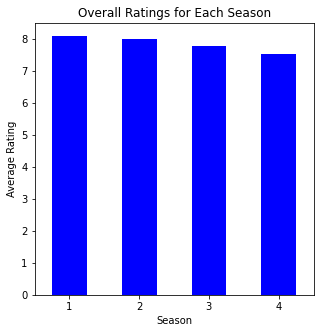

In [107]:
import matplotlib.pyplot as plt
# Group the data by season and calculate the mean rating for each season
season_ratings = df.groupby('season')['new_rating'].mean()

# Plot the ratings for each season
plt.figure(figsize=(5, 5))
season_ratings.plot(kind='bar', color='blue')
plt.title('Overall Ratings for Each Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

#### Get all the episode names, whose average rating is more than 8 for every season

In [108]:
# Calculate the average rating for each episode in each season
average_ratings = df.groupby(['season', 'name'])['new_rating'].mean().reset_index()

In [109]:
average_ratings[average_ratings['new_rating']>8]

,season,name,new_rating
4,1,The Bicameral Mind,8.7
7,1,The Well-Tempered Clavier,8.5
9,1,Trompe L'Oeil,8.6
12,2,Kiksuya,8.7
16,2,The Passenger,8.5
18,2,Vanishing Point,8.4


#### Get all the episode names that aired before May 2019

In [110]:
df['airdate'] = pd.to_datetime(df['airdate'])

In [111]:
df['month'] = df['airdate'].dt.month
df['year'] = df['airdate'].dt.year

In [112]:
features=['name','month','year']
df[features].head(2)

,name,month,year
0,The Original,10,2016
1,Chestnut,10,2016


In [113]:
df[(df['month']>5) & (df['year']>2019)][['name']]

,name
28,The Auguries
29,Well Enough Alone
30,Années Folles
31,Generation Loss
32,Zhuangzi
33,Fidelity
34,Metanoia
35,"Que Será, Será"


#### Get the episode name from each season with the highest and lowest rating

In [114]:
# Group the data by season and find the episode with the highest rating
max_rating_per_season = df.groupby('season')['new_rating'].idxmax()
max_rating_per_season

season
1     9
2    17
3    20
4    32
Name: new_rating, dtype: int64

In [115]:
max_rating_episodes = df.loc[max_rating_per_season, ['season','name', 'new_rating']]
max_rating_episodes 

,season,name,new_rating
9,1,The Bicameral Mind,8.7
17,2,Kiksuya,8.7
20,3,Parce Domine,8.0
32,4,Zhuangzi,7.8


In [116]:
# Group the data by season and find the episode with the lowest rating
min_rating_per_season = df.groupby('season')['new_rating'].idxmin()
min_rating_per_season

season
1     2
2    14
3    25
4    28
Name: new_rating, dtype: int64

In [117]:
min_rating_episodes = df.loc[min_rating_per_season, ['season', 'name', 'new_rating']]
min_rating_episodes

,season,name,new_rating
2,1,The Stray,7.6
14,2,Akane No Mai,7.6
25,3,Decoherence,7.5
28,4,The Auguries,7.1


#### Get the summary for the most popular ( ratings ) episode in every season

In [118]:
# Sort the data by season and rating in descending order
sorted_df = df.sort_values(['season', 'new_rating'], ascending=[True, False])

In [119]:
# Group the data by season and retrieve the top row (episode with highest rating) in each group
most_popular_episodes = sorted_df.groupby('season').head(1)
most_popular_episodes

,id,url,name,season,number,type,airdate,airtime,runtime,rating,summary,medium image link,Original image link,new_rating,month,year
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,2023-05-26 21:00:00,90,{'average': 8.7},<p>Delores finds out the truth about William's...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,8.7,12,2016
17,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,2023-05-26 21:00:00,60,{'average': 8.7},<p>Another of Westworld's Host revolutionaries...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,8.7,6,2018
20,1789333,https://www.tvmaze.com/episodes/1789333/westwo...,Parce Domine,3,1,regular,2020-03-15,2023-05-26 21:00:00,70,{'average': 8},"<p>If you're stuck in a loop, try walking in a...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,8.0,3,2020
32,2326658,https://www.tvmaze.com/episodes/2326658/westwo...,Zhuangzi,4,5,regular,2022-07-24,2023-05-26 21:00:00,60,{'average': 7.8},<p>God is bored.</p>,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,7.8,7,2022


In [120]:
features = ['name','season','new_rating']
most_popular_episodes[features]

,name,season,new_rating
9,The Bicameral Mind,1,8.7
17,Kiksuya,2,8.7
20,Parce Domine,3,8.0
32,Zhuangzi,4,7.8


### Question 9 -

**Write a program to read the data from the following link, perform data analysis and answer the following questions**

**Note**

1. Write code comments wherever required for code understanding

**Link** - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
    
Insights to be drawn -
- Get all the cars and their types that do not qualify for clean alternative fuel vehicle
- Get all TESLA cars with the model year, and model type made in Bothell City.
- Get all the cars that have an electric range of more than 100, and were made after 2015
- Draw plots to show the distribution between city and electric vehicle type

In [121]:
link = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'

In [122]:
import requests

def download_data(link, output_file):
    """
    This function downloads data from a URL and saves it as a CSV file.
    ==================================================================
    Args:
    Args:
    string: Input string->link,output file name
    
    Returns:
    csv file
    """
    try:
        # Download the data from the provided URL
        response = requests.get(link)
        response.raise_for_status()  # Check if the request was successful
        
        # Save the response content as a CSV file
        with open(output_file, 'wb') as file:
            file.write(response.content)
        
        print(f"Data downloaded and saved as '{output_file}'")
              
    except:
        print("An error occured")


In [123]:
link = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
output_file = 'Electric_Vehicle_Population_Data.csv'

download_data(link, output_file)

Data downloaded and saved as 'Electric_Vehicle_Population_Data.csv'


In [124]:
data = pd.read_csv('../python/Electric_Vehicle_Population_Data.csv')

In [125]:
data.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10


#### Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [126]:
cars_not_qaulify = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']

In [127]:
#cars_not_qaulify[['Make','Model']]

In [128]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [129]:
cars_not_qaulify['Make'].unique()

array(['FORD', 'AUDI', 'TESLA', 'KIA', 'BMW', 'TOYOTA', 'JEEP', 'VOLVO',
       'CHEVROLET', 'PORSCHE', 'HYUNDAI', 'MERCEDES-BENZ', 'RIVIAN',
       'VOLKSWAGEN', 'NISSAN', 'JAGUAR', 'LINCOLN', 'MITSUBISHI', 'MINI',
       'POLESTAR', 'GENESIS', 'SUBARU', 'LUCID', 'LEXUS', 'CADILLAC',
       'LAND ROVER', 'HONDA', 'BENTLEY'], dtype=object)

In [130]:
cars_not_qaulify['Model'].unique()

array(['FUSION', 'Q5 E', 'C-MAX', 'MODEL Y', 'NIRO', 'X5', 'PRIUS PRIME',
       'WRANGLER', 'XC60', 'XC90', 'MODEL 3', 'A3', 'OPTIMA', 'BOLT EV',
       'PRIUS PLUG-IN', 'MUSTANG MACH-E', 'BOLT EUV', 'CAYENNE', 'X3',
       'KONA ELECTRIC', '530E', 'EQB-CLASS', 'MODEL X', 'R1T', 'TRANSIT',
       'ID.4', 'LEAF', 'I-PACE', 'AVIATOR', 'C-CLASS', 'OUTLANDER',
       'SONATA', 'GRAND CHEROKEE', 'IONIQ 5', 'E-TRON', 'EV6',
       'EQS-CLASS SEDAN', 'MODEL S', 'R1S', 'IX', 'I8', '330E',
       'COUNTRYMAN', nan, 'S60', 'F-150', 'XC40', 'IONIQ', 'TAYCAN', 'Q5',
       'GLE-CLASS', 'HARDTOP', 'I4', 'IONIQ 6', 'PS2', 'PANAMERA',
       'GLC-CLASS', 'Q4', 'C40', 'CORSAIR', 'I3', 'S90', 'GV60',
       'E-TRON GT', 'CROSSTREK', 'SOLTERRA', 'AIR', 'ARIYA',
       'EQS-CLASS SUV', 'RZ 450E', 'LYRIQ', 'RS E-TRON GT', 'V60', 'G80',
       'RANGE ROVER SPORT', 'BZ4X', 'EQE-CLASS SEDAN', 'E-TRON SPORTBACK',
       'ACCORD', '740E', 'RANGE ROVER', 'S-CLASS', 'EDV', '918',
       'SOUL EV', 'A7', '745E',

#### Get all TESLA cars with the model year, and model type made in Bothell City

In [131]:
bothell_cars = data[(data['City'] == 'Bothell') & (data['Make'] == 'TESLA')]

In [132]:
#bothell_cars[['Model Year']]

In [133]:
bothell_cars['Model Year'].unique()

array([2020, 2022, 2018, 2017, 2021, 2023, 2015, 2019, 2016, 2014, 2013,
       2012], dtype=int64)

In [134]:
#bothell_cars[['Model']]

In [135]:
bothell_cars['Model'].unique()

array(['MODEL 3', 'MODEL Y', 'MODEL X', 'MODEL S'], dtype=object)

#### Get all the cars that have an electric range of more than 100, and were made after 2015

In [136]:
data.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10


In [137]:
cars = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]

In [138]:
#cars[['Make','Model']]

#### Draw plots to show the distribution between city and electric vehicle type

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
data['City'].nunique()

656

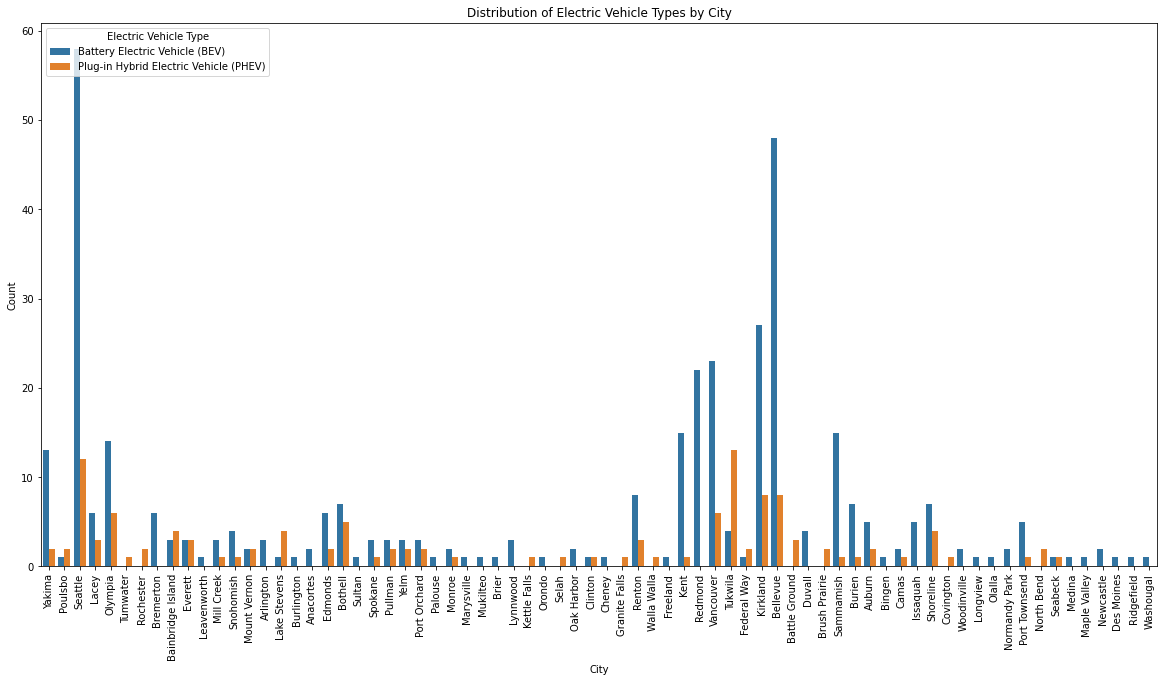

In [141]:
plt.figure(figsize=(20,10))
sns.countplot(data=data[0:500], x='City', hue='Electric Vehicle Type')
plt.title('Distribution of Electric Vehicle Types by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Electric Vehicle Type')
plt.show()

### Question 10

**Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or paragraph, and return their respective count as a dictionary.**

**Note**

1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.

In [142]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Perform Part-of-Speech tagging
    tagged_words = pos_tag(words)
    
    # Initialize counters
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0
    
    # Count the number of verbs, nouns, pronouns, and adjectives
    for word, tag in tagged_words:
        if tag.startswith('VB'):
            verb_count += 1
        elif tag.startswith('NN'):
            noun_count += 1
        elif tag.startswith('PRP'):
            pronoun_count += 1
        elif tag.startswith('JJ'):
            adjective_count += 1
    
    # Create a dictionary with the counts
    counts = {
        'verbs': verb_count,
        'nouns': noun_count,
        'pronouns': pronoun_count,
        'adjectives': adjective_count
    }
    
    return counts

# Example usage
text = "The quick brown fox jumps over the lazy dog."
result = count_pos_tags(text)
print(result)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


{'verbs': 1, 'nouns': 3, 'pronouns': 0, 'adjectives': 2}
